In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import time
from kernel import *
from shift import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
x = plt.imread('windmill.png')
y = plt.imread('lake.png')

## 1. Image Shift

2. 

<IPython.core.display.Javascript object>


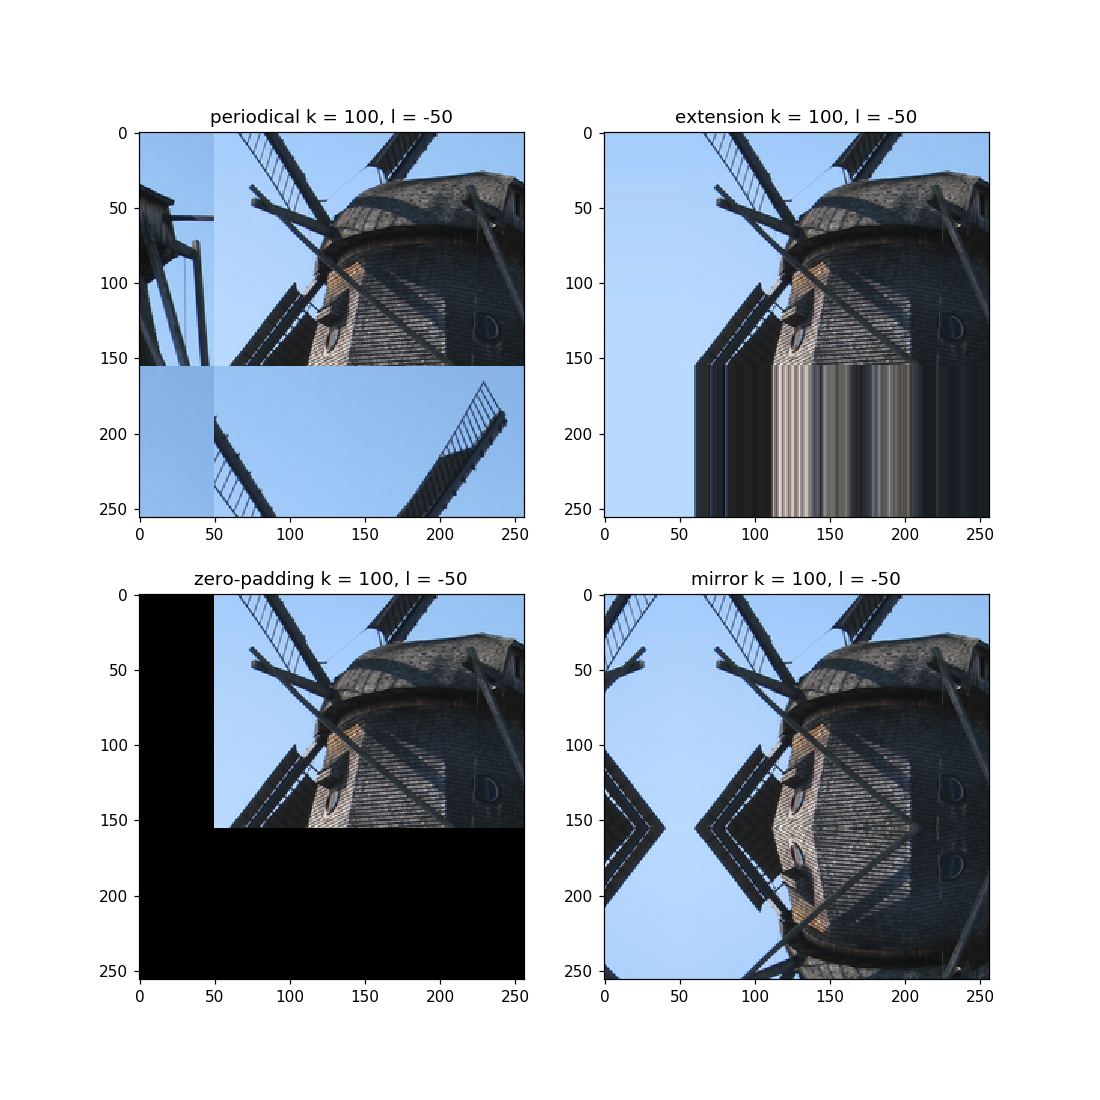

In [12]:
s = ['periodical','extension','zero-padding','mirror']
f = plt.figure(figsize=(10,10))
cnt = 1
k = 100
l = -50
for i in s:
    res = shift(x,k,l,s[cnt-1])
    ax = plt.subplot(2,2,cnt)
    ax.set_title(s[cnt-1] + " k = " + str(k) + ", l = " + str(l) )
    ax.imshow(res)
    cnt += 1

3. 

In [13]:
a = -5
b = -20
i = 100
j = -50
s = ['periodical','extension','zero-padding','mirror']
for cur in s:
    p_direc = shift(a*x+b*y,i,j,boundary = cur)
    p_sep = a*shift(x,i,j,boundary = cur) + b*shift(y,i,j,boundary = cur)
    print(cur +" = " + str(np.allclose(p_direc, p_sep)))

periodical = True
extension = True
zero-padding = True
mirror = True


It doesn't depend on boundary conditions since all of the shift operation is linear!

4. 

<IPython.core.display.Javascript object>


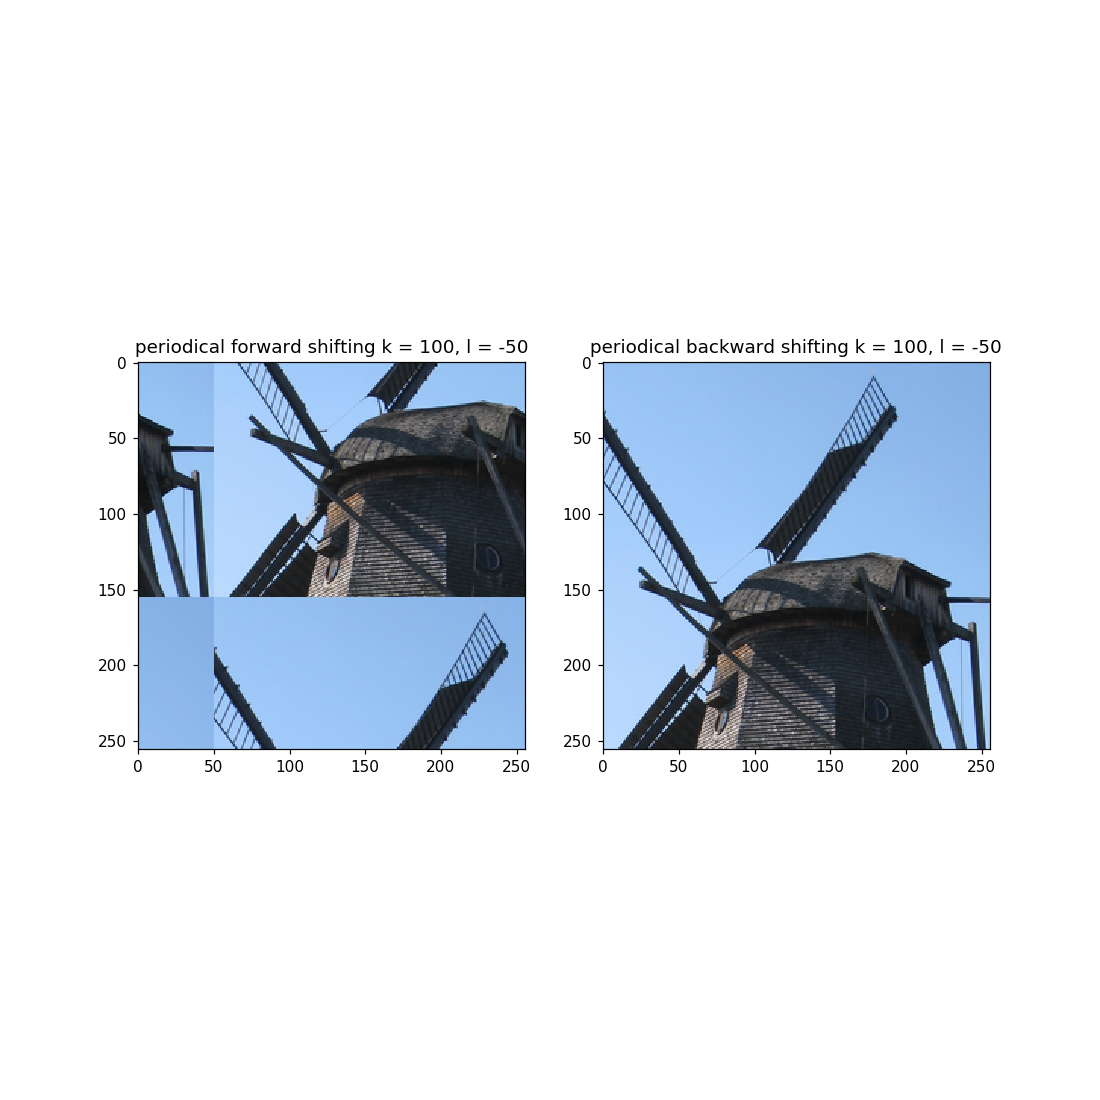

<IPython.core.display.Javascript object>


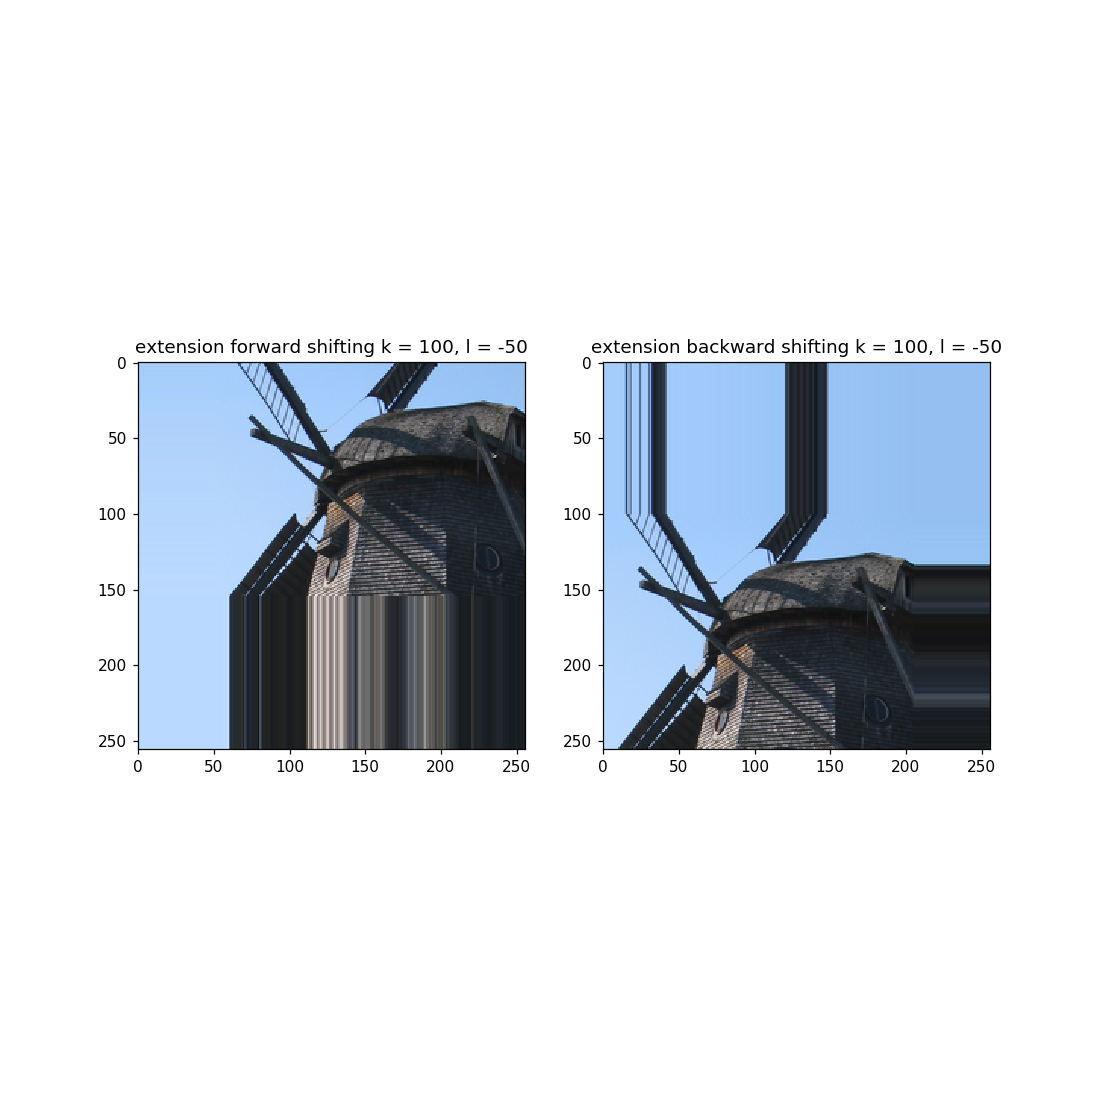

<IPython.core.display.Javascript object>


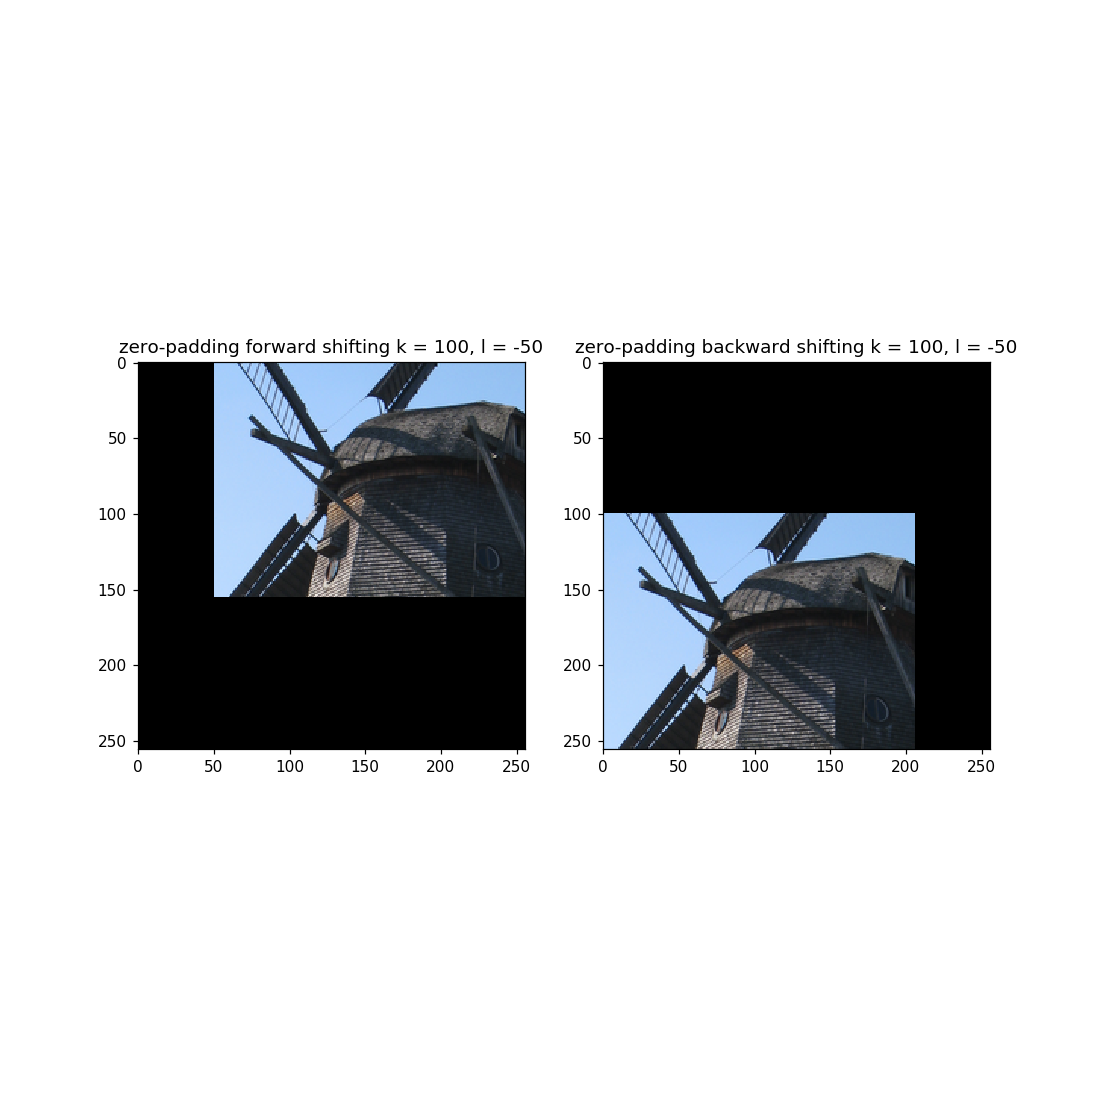

<IPython.core.display.Javascript object>


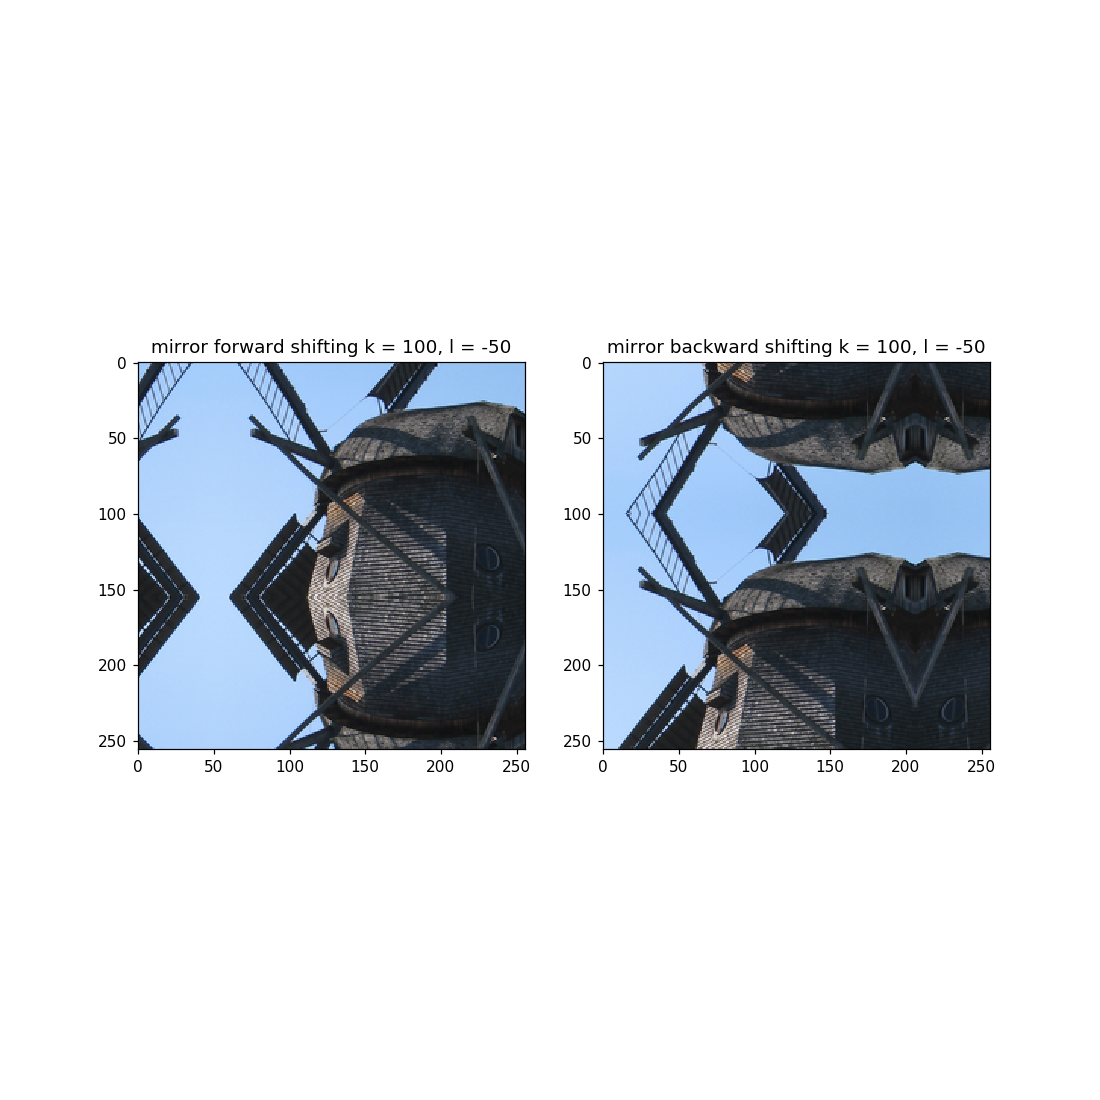

In [14]:
cnt = 1
for cur in s:
    f = plt.figure(figsize=(10,10))
    res = shift(x,i,j,boundary = cur)
    ax = plt.subplot(1,2,1)
    ax.set_title(s[cnt-1]+ " forward shifting" + " k = " + str(i) + ", l = " + str(j) )
    ax.imshow(res)
    res = shift(res,-i,-j,boundary = cur)
    ax = plt.subplot(1,2,2)
    ax.set_title(s[cnt-1] + " backward shifting" +  " k = " + str(i) + ", l = " + str(j) )
    plt.imshow(res)
    cnt += 1

1. The only shift that is one-to-one is periodical boundary
2. The null space is the set of images that after shifting will result to an image equals 0, it encodes what is lost. The null space is the region that cannot be shift back.

## 2 Image Convolution

6. 

In [15]:
def convolve_naive(x, nu):
    n1, n2 = x.shape[:2]
    s1 = int((nu.shape[0] - 1) / 2)
    s2 = int((nu.shape[1] - 1) / 2)
    xconv = np.zeros(x.shape)
    for i in range(s1, n1-s1):
        for j in range(s2, n2-s2):
            #kernel part
            for k in range(-s1, s1+1):
                for l in range(-s2, s2+1):
                    xconv[i][j] += x[i-k][j-l]*nu[k+s1][l+s2]
    return xconv

7. 

In [16]:
def convolve(x, nu, boundary ):
    xconv = np.zeros(x.shape)
    s1 = int((nu.shape[0] - 1) / 2)
    s2 = int((nu.shape[1] - 1) / 2)
    for k in range(-s1, s1+1):
        for l in range(-s2, s2+1):
            xconv += nu[k+s1,l+s2]*shift(x,-k,-l,boundary)
    return xconv

8. 

<IPython.core.display.Javascript object>


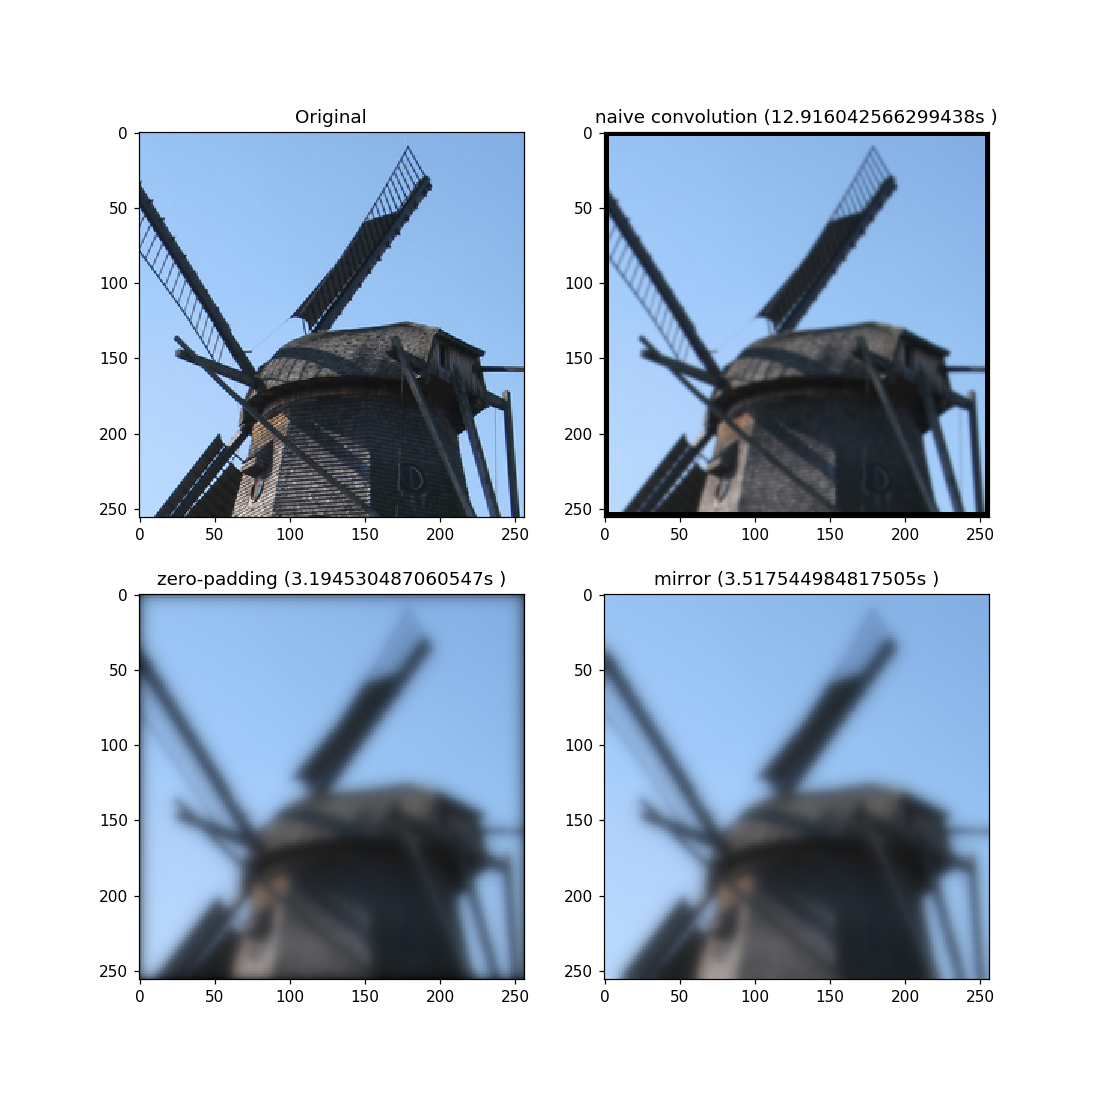

In [17]:
cnt = 1
f = plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,cnt)
ax.set_title("Original")
ax.imshow(x)
cnt += 1
start_time = time.time()
res = convolve_naive(x,kernel('gaussian',1,1e-3))
elapsed_time = time.time() - start_time
ax = plt.subplot(2,2,cnt)
ax.set_title("naive convolution" + " (" + str(elapsed_time) + "s )")
ax.imshow(res)
cnt += 1

s = ['zero-padding','mirror']
for i in s:
    start_time = time.time()
    res = convolve(x,kernel('exponential',1,1e-3), s[cnt-3])
    elapsed_time = time.time() - start_time
    ax = plt.subplot(2,2,cnt)
    ax.set_title(s[cnt-3] + " (" + str(elapsed_time) + "s )")
    ax.imshow(res)
    cnt += 1

9. 

In [11]:
nu = ['gaussian','exponential','box']
boundary = ['periodical','extension','zero-padding','mirror']
a = [13,-13]
b = [6, 6]
for p in range(2):
    print("a = "+ str(a[p]) + " b = " + str(b[p]))
    for i in nu:
        for j in boundary:
            comb = convolve(a[p]*x+b[p]*y,kernel(i,1,1e-3), boundary)
            sep = a[p]*convolve(x,kernel(i,1,1e-3), boundary) + b[p]*convolve(y,kernel(i,1,1e-3), boundary)
            print("kernel = " + i + ", boundary = " + j + ": \n" +str(np.allclose(comb, sep)) + "!!")
    print("\n\n")

a = 13 b = 6
kernel = gaussian, boundary = periodical: 
True!!
kernel = gaussian, boundary = extension: 
True!!
kernel = gaussian, boundary = zero-padding: 
True!!
kernel = gaussian, boundary = mirror: 
True!!
kernel = exponential, boundary = periodical: 
True!!
kernel = exponential, boundary = extension: 
True!!
kernel = exponential, boundary = zero-padding: 
True!!
kernel = exponential, boundary = mirror: 
True!!
kernel = box, boundary = periodical: 
True!!
kernel = box, boundary = extension: 
True!!
kernel = box, boundary = zero-padding: 
True!!
kernel = box, boundary = mirror: 
True!!



a = -13 b = 6
kernel = gaussian, boundary = periodical: 
False!!
kernel = gaussian, boundary = extension: 
False!!
kernel = gaussian, boundary = zero-padding: 
False!!
kernel = gaussian, boundary = mirror: 
False!!
kernel = exponential, boundary = periodical: 
False!!
kernel = exponential, boundary = extension: 
False!!
kernel = exponential, boundary = zero-padding: 
False!!
kernel = exponential, b

1. No, it is non-linear since for soma a and b,such as when a = -13, b = 6 the equation doesn't holds
2. It neither depend on boundary conditions nor nu.